In [2]:
import pandas as pd
import numpy as np

In [20]:
print('Country A: Bangkok')

print("Data Preparation A : ")
print("    ")

# Specifying the path of the dataset 
dataset_bangkok_path=r'C:\Users\Ananya Pal\Documents\TUD\1st semester\Introduction to Python\data-analysis-plotting-tool\data-analysis-plotting-tool\historical_weather_data\data\bangkok_2020-01-01_2024-01-27.csv'
# Read the selected data
df = pd.read_csv(dataset_bangkok_path)
# list the fields/variables
display(df.head())
# Specifying the columns to be dropped
columns_to_drop = ['Unnamed: 0', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'sunrise', 'sunset', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration']
# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)
# list the fields/variables
display(df.head())
# printing all column names
column_names = df.columns.tolist()
print(column_names)
# identifing their types
display(df.dtypes)

print("     ")
print("Data Preparation 'b':")

print("     ")
print('Outliers:')
print("     ")

# Columns to detect and remove outliers
columns_to_check = ['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean',
                     'daylight_duration', 'sunshine_duration', 'precipitation_sum', 'rain_sum', 'snowfall_sum',
                     'precipitation_hours']

# Loop through each column
for column in columns_to_check:
    # Calculate quartiles and IQR for the current column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers for the current column
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

    # Print outliers for the current column
    print(f"Outliers in '{column}':")
    print(outliers[['date', column]])
    
    # Remove outliers for the current column
    df = df[~((df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR))]

# Display the DataFrame after removing outliers
print("After Fixing the Outliers:")
display(df.head())


print("     ")
print('inconsistencies:')
print("     ")

# List of columns to check for missing values
columns_to_check = ['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean',
                     'daylight_duration', 'sunshine_duration', 'precipitation_sum', 'rain_sum', 'snowfall_sum',
                     'precipitation_hours']

# Step 1: Check for Missing Values
missing_values_summary = df[columns_to_check].isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary)

# Step 2: Fix Missing Values
# Impute missing values with the mean for each column
df[columns_to_check] = df[columns_to_check].fillna(df[columns_to_check].mean())

# Display the DataFrame after fixing missing values
print("\nDataFrame after fixing missing values:")
print(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('bangkok_cleaned_data.csv', index=False)

Country A: Bangkok
Data Preparation A : 
    


,Unnamed: 0,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,...,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,0,2020-01-01,1.0,33.632500,24.332499,28.763756,34.013718,26.062157,30.031357,0,...,38087.770,0.0,0.0,0.0,0.0,21.674870,38.880000,56.664223,18.99,5.601125
1,1,2020-01-02,2.0,33.332500,23.832499,28.780418,34.916040,25.808203,30.477592,0,...,38100.996,0.0,0.0,0.0,0.0,18.511143,34.920000,50.494526,18.44,5.277694
2,2,2020-01-03,1.0,33.732502,23.432499,28.830421,35.480530,25.682440,31.069640,0,...,38115.348,0.0,0.0,0.0,0.0,13.089354,25.919998,54.083694,17.87,4.778579
3,3,2020-01-04,2.0,33.482502,23.432499,28.899168,35.481490,26.331448,31.355614,0,...,38130.780,0.0,0.0,0.0,0.0,12.074766,26.640000,58.684086,17.87,4.738755
4,4,2020-01-05,0.0,34.132500,23.532500,28.761667,35.482212,26.092035,30.877304,0,...,38147.290,0.0,0.0,0.0,0.0,15.158522,30.239998,62.248420,19.35,5.018105


,date,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours
0,2020-01-01,1.0,33.632500,24.332499,30.031357,40787.664,38087.770,0.0,0.0,0.0,0.0
1,2020-01-02,2.0,33.332500,23.832499,30.477592,40799.340,38100.996,0.0,0.0,0.0,0.0
2,2020-01-03,1.0,33.732502,23.432499,31.069640,40812.016,38115.348,0.0,0.0,0.0,0.0
3,2020-01-04,2.0,33.482502,23.432499,31.355614,40825.664,38130.780,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,34.132500,23.532500,30.877304,40840.260,38147.290,0.0,0.0,0.0,0.0


['date', 'weather_code', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'daylight_duration', 'sunshine_duration', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours']


date                          object
weather_code                 float64
temperature_2m_max           float64
temperature_2m_min           float64
apparent_temperature_mean    float64
daylight_duration            float64
sunshine_duration            float64
precipitation_sum            float64
rain_sum                     float64
snowfall_sum                 float64
precipitation_hours          float64
dtype: object

     
Data Preparation 'b':
     
Outliers:
     
Outliers in 'weather_code':
Empty DataFrame
Columns: [date, weather_code]
Index: []
Outliers in 'temperature_2m_max':
            date  temperature_2m_max
68    2020-03-09           37.582500
281   2020-10-08           26.582499
282   2020-10-09           26.932499
283   2020-10-10           25.482500
284   2020-10-11           27.032500
286   2020-10-13           25.782500
290   2020-10-17           25.882500
291   2020-10-18           25.632500
315   2020-11-11           25.882500
316   2020-11-12           25.732500
355   2020-12-21           26.632500
366   2021-01-01           26.632500
377   2021-01-12           25.482500
378   2021-01-13           25.632500
520   2021-06-04           37.932503
535   2021-06-19           36.982502
536   2021-06-20           37.232502
549   2021-07-03           36.932503
550   2021-07-04           37.432503
551   2021-07-05           38.382500
634   2021-09-26           26.632500
655   2021-10-17  

,date,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours
0,2020-01-01,1.0,33.632500,24.332499,30.031357,40787.664,38087.770,0.0,0.0,0.0,0.0
1,2020-01-02,2.0,33.332500,23.832499,30.477592,40799.340,38100.996,0.0,0.0,0.0,0.0
2,2020-01-03,1.0,33.732502,23.432499,31.069640,40812.016,38115.348,0.0,0.0,0.0,0.0
3,2020-01-04,2.0,33.482502,23.432499,31.355614,40825.664,38130.780,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,34.132500,23.532500,30.877304,40840.260,38147.290,0.0,0.0,0.0,0.0


     
inconsistencies:
     
Missing Values Summary:
weather_code                 0
temperature_2m_max           0
temperature_2m_min           0
apparent_temperature_mean    0
daylight_duration            0
sunshine_duration            0
precipitation_sum            0
rain_sum                     0
snowfall_sum                 0
precipitation_hours          0
dtype: int64

DataFrame after fixing missing values:
         date  weather_code  temperature_2m_max  temperature_2m_min  \
0  2020-01-01           1.0           33.632500           24.332499   
1  2020-01-02           2.0           33.332500           23.832499   
2  2020-01-03           1.0           33.732502           23.432499   
3  2020-01-04           2.0           33.482502           23.432499   
4  2020-01-05           0.0           34.132500           23.532500   

   apparent_temperature_mean  daylight_duration  sunshine_duration  \
0                  30.031357          40787.664          38087.770   
1                

,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.0,1097.000000
mean,41.348222,32.452190,24.969418,32.938437,43641.358151,35769.323456,2.262078,2.262078,0.0,3.880583
std,24.872686,1.594083,1.787029,2.078767,2025.832688,5823.002767,2.917257,2.917257,0.0,3.625407
min,0.000000,27.682499,19.882500,27.656914,40731.164000,14638.604000,0.000000,0.000000,0.0,0.000000
25%,3.000000,31.382500,23.782500,31.767433,41660.492000,33261.240000,0.000000,0.000000,0.0,0.000000
50%,51.000000,32.332500,25.232500,33.221550,43648.516000,38001.902000,0.800000,0.800000,0.0,3.000000
75%,61.000000,33.482502,26.132500,34.369427,45631.650000,39600.000000,3.600000,3.600000,0.0,6.000000
max,65.000000,36.832500,29.532500,37.879173,46572.890000,43073.293000,11.500000,11.500000,0.0,15.000000


,date
count,1097
unique,1097
top,2020-01-01
freq,1


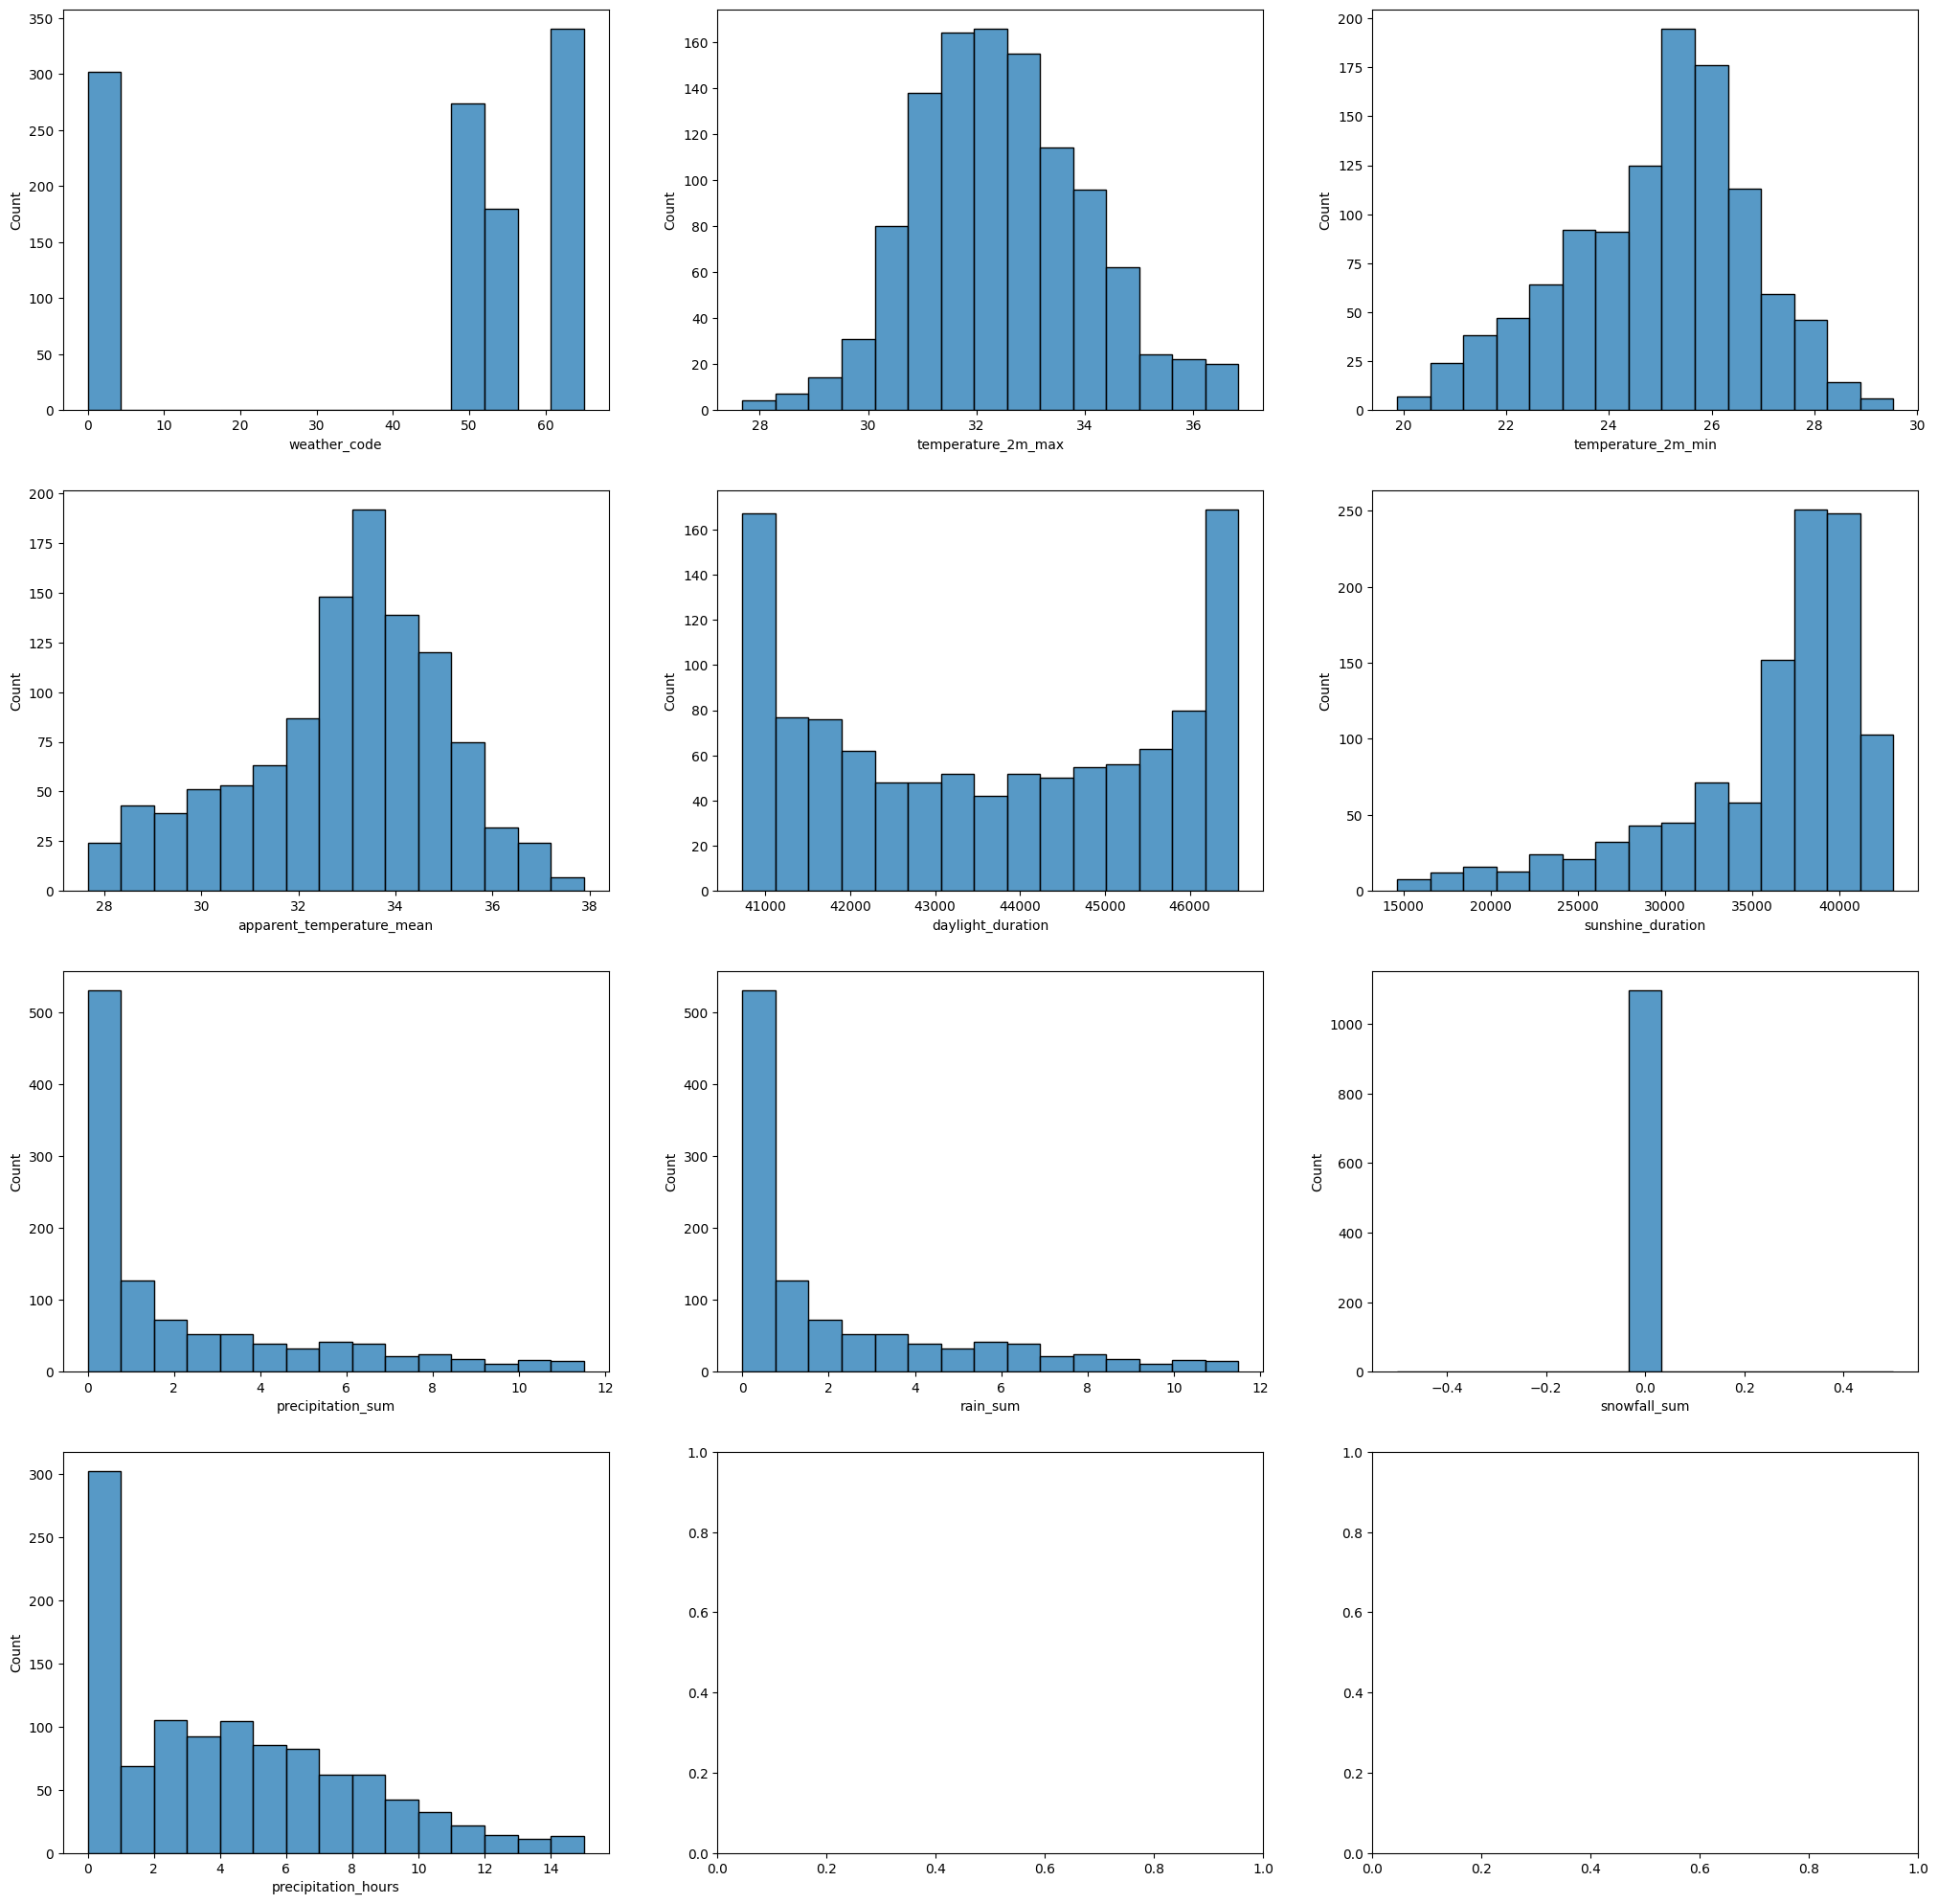

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bangkok_cleaned_data.csv')

# Display statistical summaries for numeric columns
display(df.describe(include='number'))

# Display statistical summaries for object (categorical) columns
display(df.describe(include='object'))

# # Identify numeric columns
num_columns = df.select_dtypes(exclude='object').columns

#Make univariate graphs (i.e., graphs based on single variable).

%matplotlib inline
nCols=3                         
nRows=len(num_columns)//nCols+1    
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(num_columns):
    sns.histplot(x = col, bins =15,data = df,ax=axes.flatten()[ind])
plt.show()
    
print("-"*120)
print("-"*120)


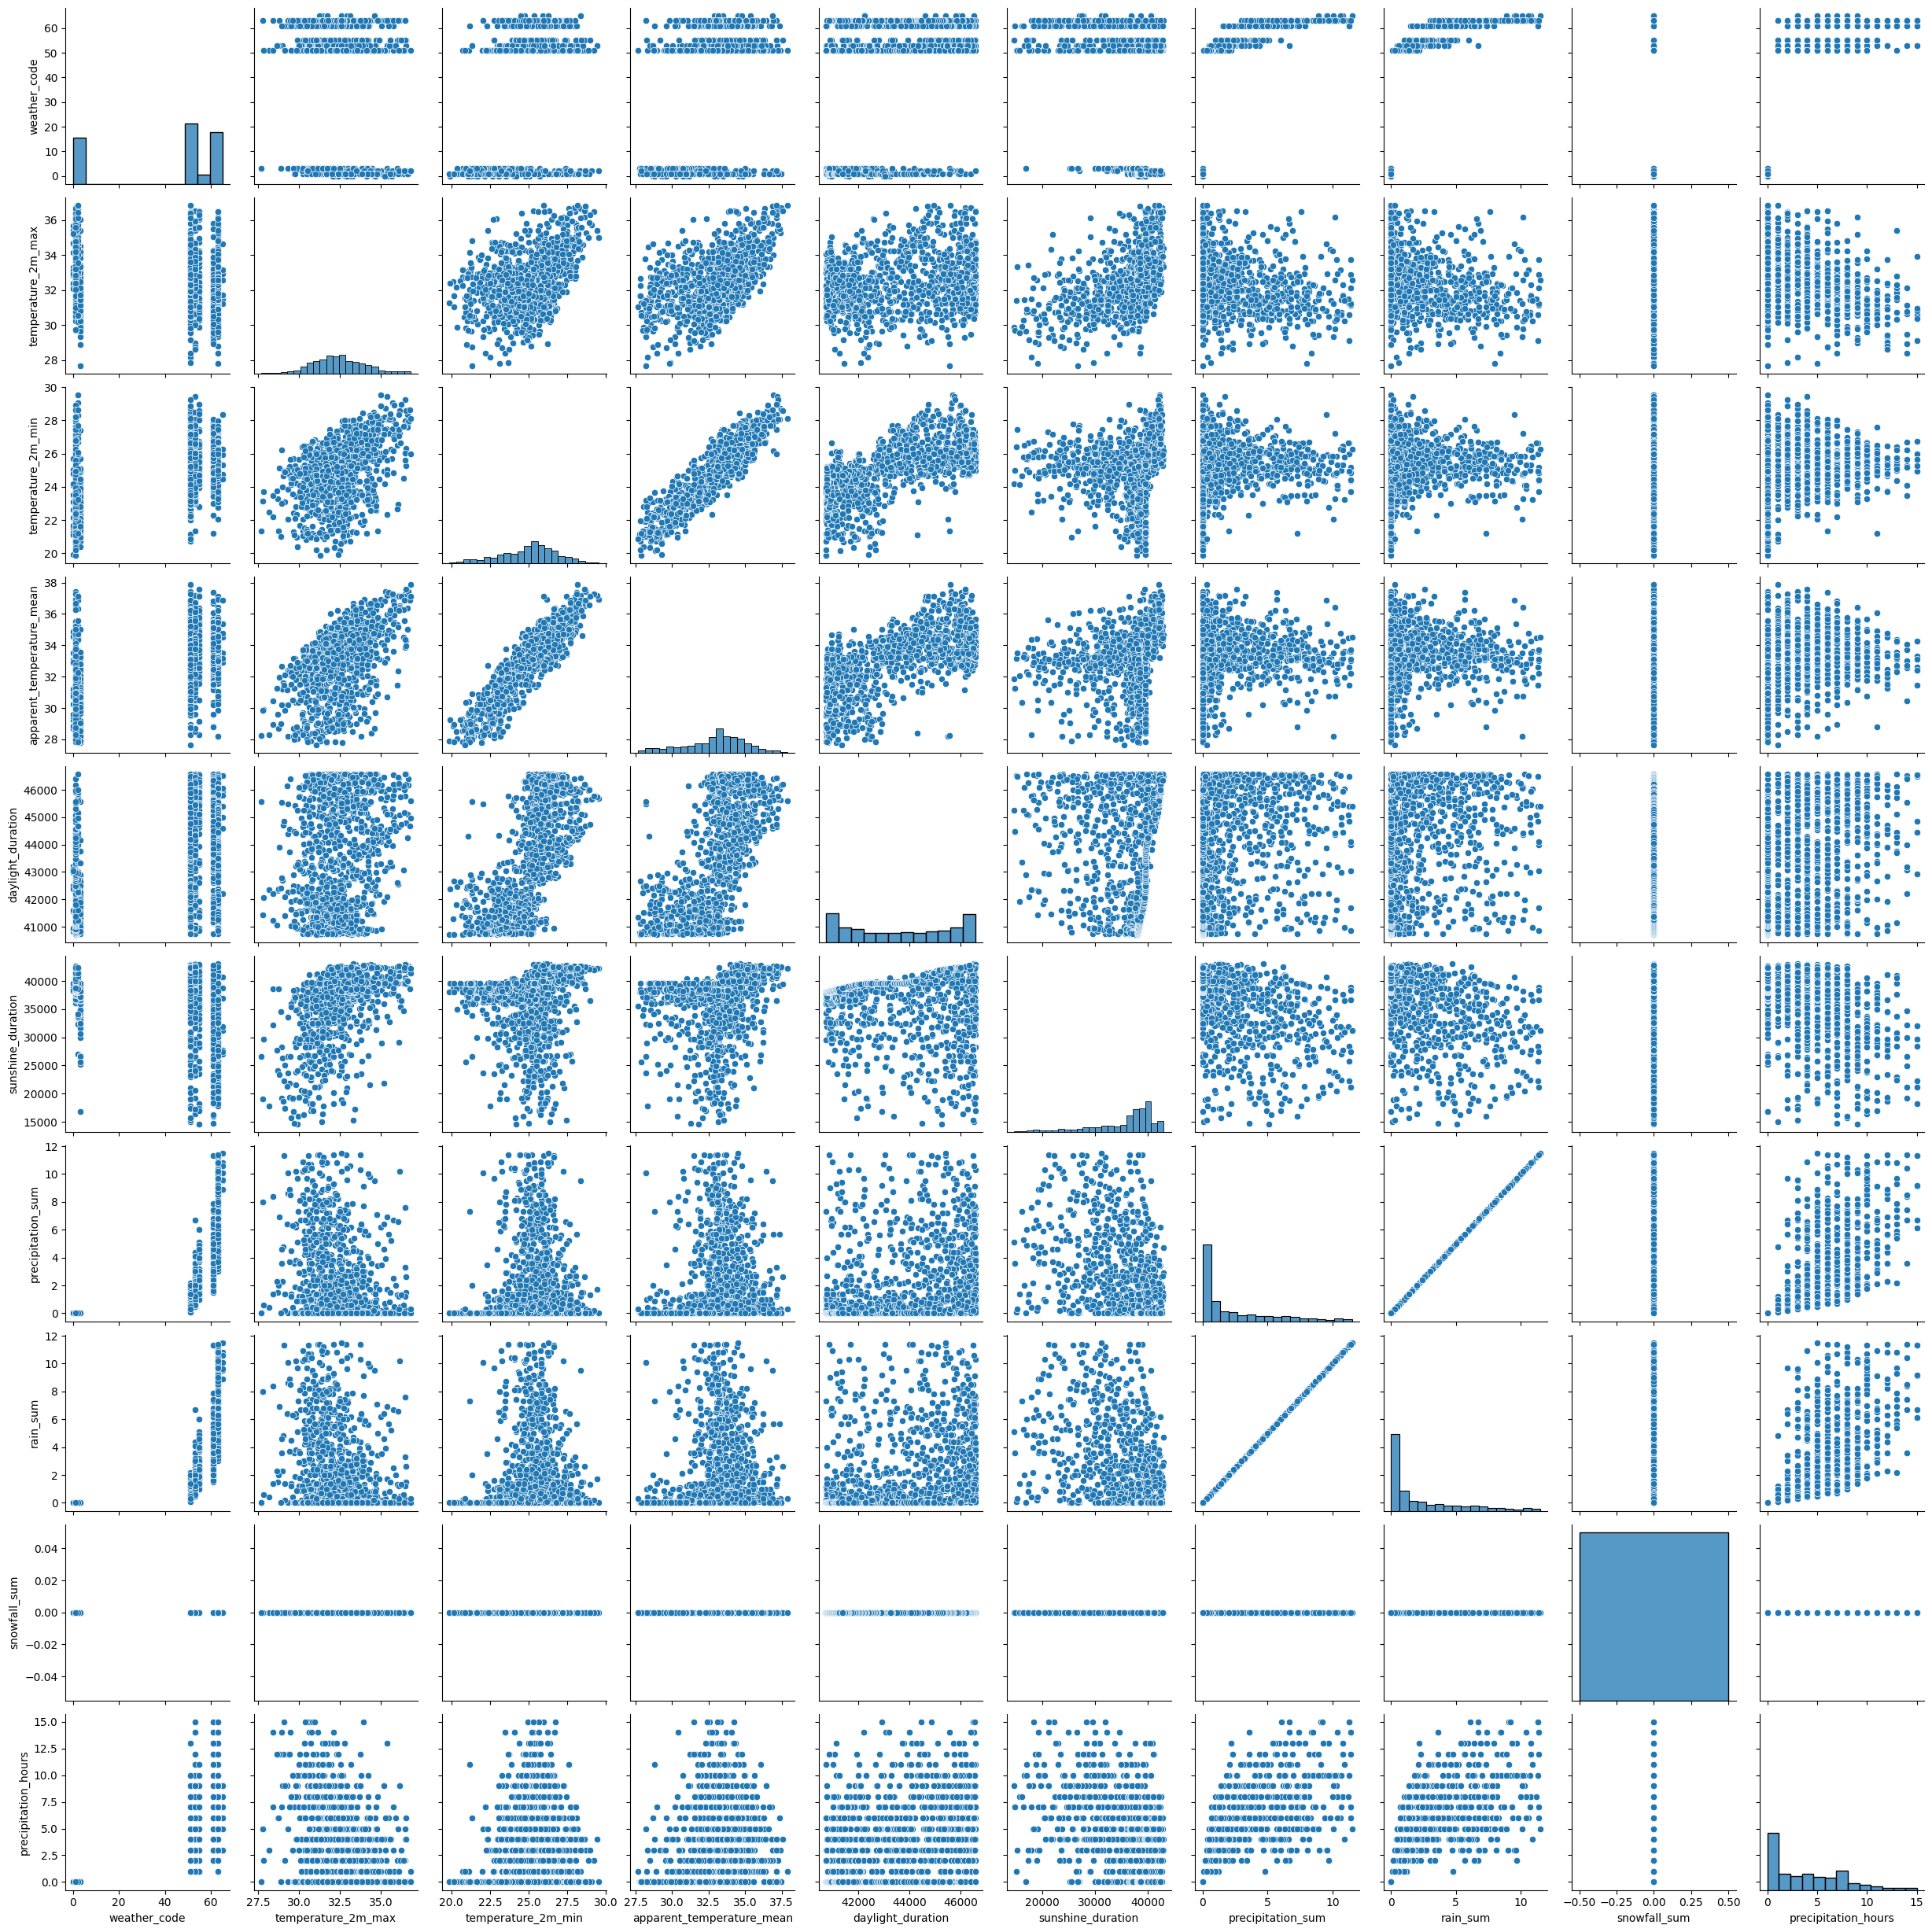

In [9]:
#Prepare bivariate plots (i.e., plots based on two variables)

# Select the numeric variables for bivariate plots
numeric_variables = ['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean',
                     'daylight_duration', 'sunshine_duration', 'precipitation_sum', 'rain_sum', 'snowfall_sum',
                     'precipitation_hours']

# Subset the DataFrame with only the selected numeric variables
numeric_df = df[numeric_variables]

# Create a pairplot
sns.pairplot(numeric_df)
plt.show()

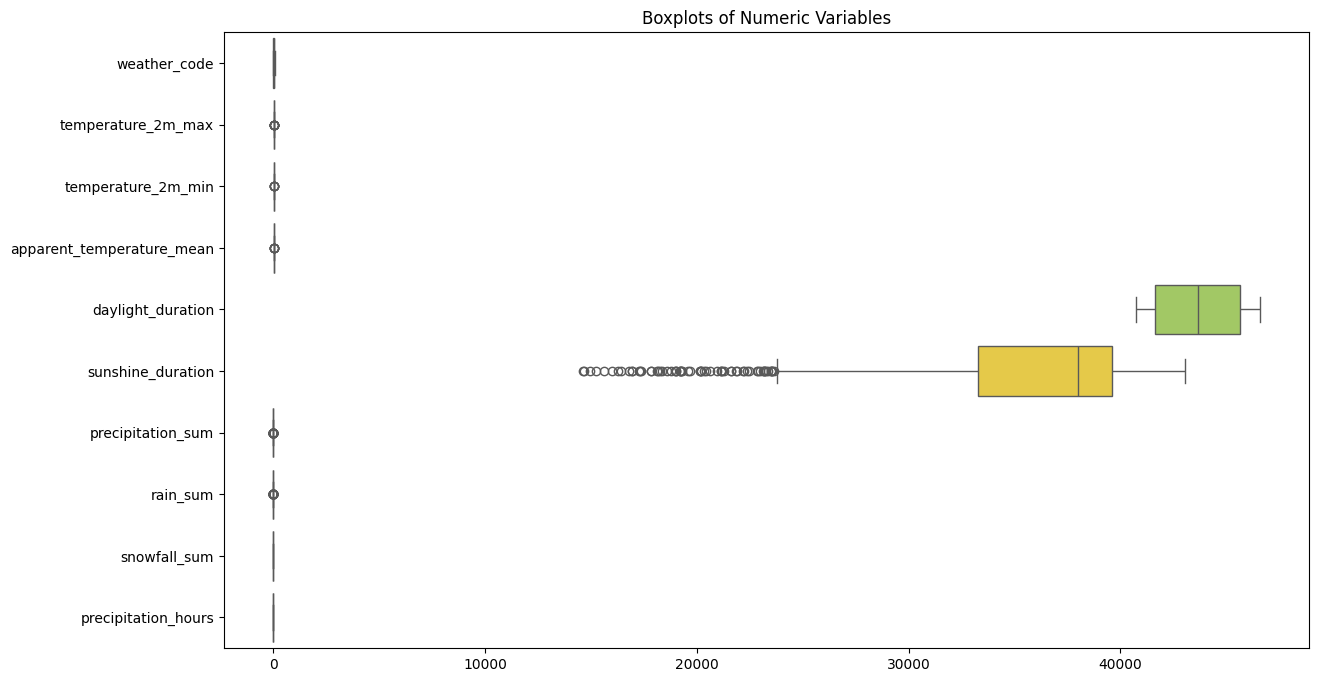

In [10]:
# Select the numeric variables for boxplots
numeric_variables = ['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean',
                     'daylight_duration', 'sunshine_duration', 'precipitation_sum', 'rain_sum', 'snowfall_sum',
                     'precipitation_hours']

# Subset the DataFrame with only the selected numeric variables
numeric_df = df[numeric_variables]

# Set up the figure with specified size
plt.figure(figsize=(14, 8))

# Create boxplots for each numeric variable
sns.boxplot(data=numeric_df, orient='h', palette='Set2')
plt.title('Boxplots of Numeric Variables')
plt.show()

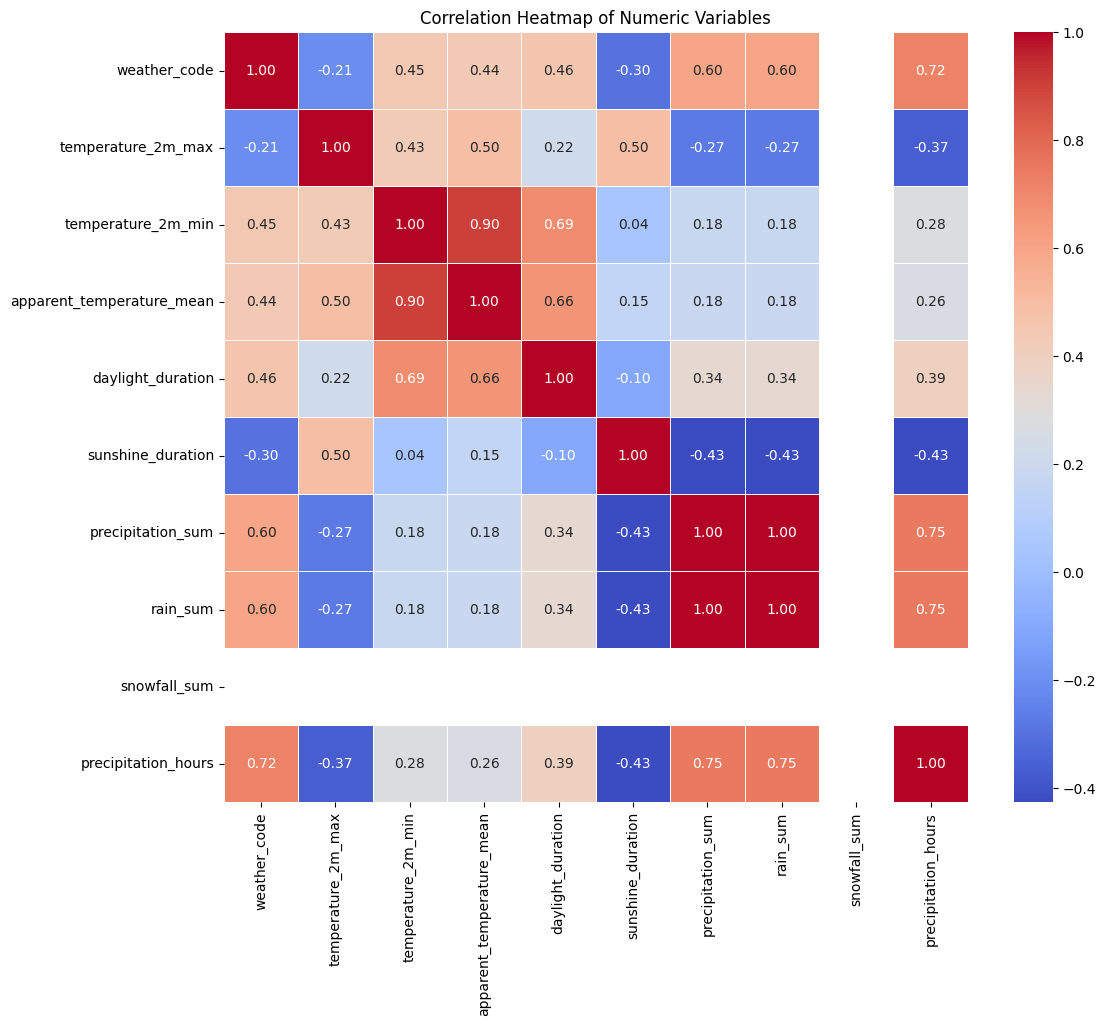

In [11]:
# Select the numeric variables for correlation heatmap
numeric_variables = ['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean',
                     'daylight_duration', 'sunshine_duration', 'precipitation_sum', 'rain_sum', 'snowfall_sum',
                     'precipitation_hours']

# Subset the DataFrame with only the selected numeric variables
numeric_df = df[numeric_variables]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the figure with specified size
plt.figure(figsize=(12, 10))

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

                            OLS Regression Results                            
Dep. Variable:      precipitation_sum   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     89.32
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           2.07e-50
Time:                        20:12:37   Log-Likelihood:                -2063.8
No. Observations:                 877   AIC:                             4136.
Df Residuals:                     873   BIC:                             4155.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7206      2

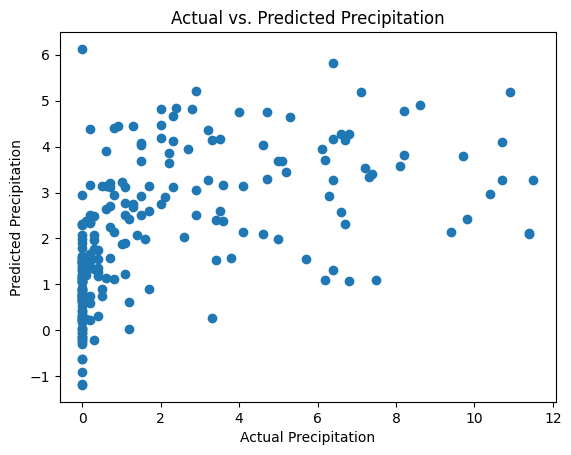

In [18]:
# We form a regression model
# We want to predict how the precipitation in Bangkok is predicted by the variables maximum temperature..
#.. minimum temperature and daylight duration

# Specify target variable and predictor variables
target_variable = 'precipitation_sum'
predictor_variables = ['temperature_2m_max', 'temperature_2m_min', 'daylight_duration']

# Check if predictor variables are in the DataFrame columns
for col in predictor_variables:
    if col not in df.columns:
        print(f"Column '{col}' not found in the DataFrame.")

# Subset the DataFrame with the selected variables
model_df = df[[target_variable] + predictor_variables]

# Split the data into training and testing sets
train_data, test_data = train_test_split(model_df, test_size=0.2, random_state=42)

# Prepare the data for the model
X_train = sm.add_constant(train_data[predictor_variables])
y_train = train_data[target_variable]

# Create and fit the regression model
model = sm.OLS(y_train, X_train).fit()

# Display the regression results
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(test_data[predictor_variables])
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(test_data[target_variable], y_pred)
print(f"\nMean Squared Error on Test Set: {mse}")

# Make predictions on the test set
X_test = sm.add_constant(test_data[predictor_variables])
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(test_data[target_variable], y_pred)
print(f"\nMean Squared Error on Test Set: {mse}")

# Visualize the predicted vs. actual values with a scatter plot
plt.scatter(test_data[target_variable], y_pred)
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs. Predicted Precipitation')
plt.show()